In [127]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [128]:
from eff_mass_plot import *
from jk import *
from utils import *
import matplotlib as mpl
import lsqfit

NT=64

mpl.rcParams.update({'font.size': 14})

In [129]:
corr=np.array(get_data("k0p1542",5,NT))
corr.shape

(280, 32)

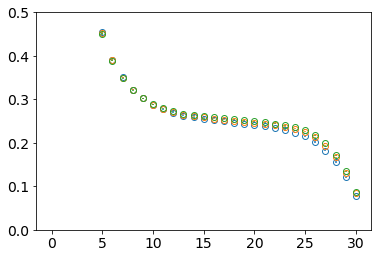

In [130]:
for cut in [0, 50, 100]:
    data =jackKnife(log_eff_mass, corr[cut:,:])

    plt.errorbar([t for t in range(int(NT/2)-1)], data[0], data[1], linestyle="None", marker="o", markerfacecolor="None")
    plt.ylim(0,0.5)

200


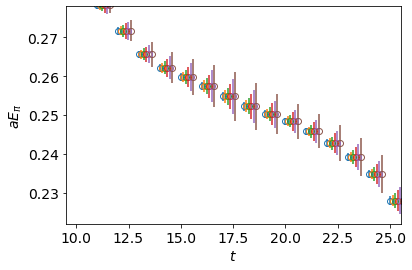

In [131]:
cut=80
print(len(corr[cut:,0]))
for i,b in enumerate([1,2,4,10,20,40]):
    data =jackKnife(log_eff_mass, corr[cut:,:], b)
    
    plt.errorbar([t+0.12*i for t in range(int(NT/2)-1)], data[0], data[1], linestyle="None", marker="o", markerfacecolor="None")
    plt.ylim(0.222,0.278)
    plt.xlim(9.5,25.5)
plt.xlabel(r'$t$')
plt.ylabel(r'$aE_{\pi}$')
plt.show()

In [178]:
cut=80
bin=10
nmean = lambda data : np.mean(data,axis=0)
fitData=jackKnifeCov(nmean, corr[cut:,:], bin)

In [179]:
def cosh_fit(x,p,NT):
    return p['a']*np.cosh(p['E']*(x-(NT/2)))

def three_exp(t,p):
    return p['a0']*np.exp(-p['E0']*t)+p['a1']*np.exp(-p['E1']*t)+p['a2']*np.exp(-p['E2']*t)

cosh_nt = lambda x,p : cosh_fit(x,p,NT)

ts = np.array([t for t in range(int(NT/2))])

ti=16
tf=32

fit=lsqfit.nonlinear_fit(
                    data=(ts[ti:tf+1],fitData[0][ti:tf+1],fitData[1][ti:tf+1,ti:tf+1]),
                    fcn=cosh_nt,
                    p0={'a': 1.0, 'E': 0.2}
                )

ti2=8
tf2=26

print(fit.chi2)
print(fit.p)

print()

fit2=lsqfit.nonlinear_fit(
                    data=(ts[ti2:tf2+1],fitData[0][ti2:tf2+1],fitData[1][ti2:tf2+1,ti2:tf2+1]),
                    fcn=three_exp,
                    p0={'a0': 1.0, 'E0': 0.2, 'a1': 0.001, 'E1': 0.05, 'a2': 0.1, 'E2': 2.2}  
)


print(fit2.chi2)
print(fit2.p)

221.17219499861295
{'a': 0.0000716(23), 'E': 0.24954(88)}

32.15118647564886
{'a0': 0.1175(23), 'E0': 0.2601(14), 'a1': 4.1(2.6)e-06, 'E1': -0.052(22), 'a2': 0.755(45), 'E2': 0.681(11)}


[0.2493245244931996, 0.24918210866451462, 0.24894769921550325, 0.24856206505453446, 0.2479281663701619, 0.24688757745433185, 0.24518314876127412, 0.242401462133446, 0.2378883177482779, 0.23063543119612007, 0.21915603442775575, 0.2014176870057613, 0.17499544213988585, 0.1377051044159752, 0.08887565992922308, 0.030818396907807567, -0.030818396907807594]


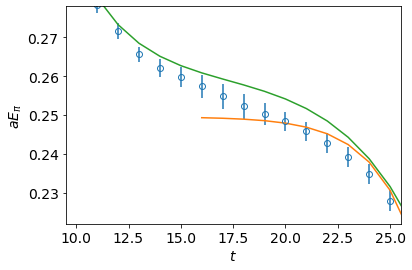

In [180]:
data=jackKnife(log_eff_mass, corr[cut:,:], bin)

fitparams={'a': fit.p['a'].mean, 'E': fit.p['E'].mean}
fitFuncdata=[np.log(cosh_fit(t,fitparams,NT)/cosh_fit(t+1,fitparams,NT)) for t in range(ti, tf+1)]
fit2params={'a0': fit2.p['a0'].mean, 'E0': fit2.p['E0'].mean,
'a1': fit2.p['a1'].mean, 'E1': fit2.p['E1'].mean,
'a2': fit2.p['a2'].mean, 'E2': fit2.p['E2'].mean}

fit2Funcdata=[np.log(three_exp(t,fit2params)/three_exp(t+1,fit2params)) for t in range(ti2, tf2+1)]
print(fitFuncdata)
plt.errorbar([t for t in range(int(NT/2)-1)], data[0], data[1], linestyle="None", marker="o", markerfacecolor="None")
plt.plot([t for t in range(ti, tf+1)],fitFuncdata)
plt.plot([t for t in range(ti2, tf2+1)],fit2Funcdata)
plt.ylim(0.222,0.278)
plt.xlim(9.5,25.5)
plt.xlabel(r'$t$')
plt.ylabel(r'$aE_{\pi}$')
plt.show()